# Summary

In [1]:
# the purpose of this program is to parse through all the 
import math
import numpy as np
import pandas as pd
import random
import os
import json
import pprint
import tensorflow as tf
import re 
from pandas.io.json import json_normalize
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn


In [2]:
#%%timeit
initial_path = "/data/data"
root_dir = os.listdir(initial_path)
list_of_json = []
counter_total = 0;
for dir in root_dir:
    curr_path = initial_path + "/" + dir + "/enrichment/dns"
    #print(curr_dir)
    if os.path.exists(curr_path):
        curr_dir = os.listdir(curr_path)
        for sub_json in curr_dir:
        #do i need the last /
            each_json = curr_path + "/" + sub_json
            #print(each_json)
            ran =random.random()
            if(ran<.5):
                counter_total = counter_total+1
                #print('counter_total'+ str(counter_total))
                list_of_json.append(each_json)
    else:
        pass    
print('counter_total'+ str(counter_total))

counter_total6613


In [3]:
data_total = []
a_df = pd.DataFrame()
target_function_list = []
list_of_bad_json = []
for a_json in list_of_json:
    #print('Test')
    with open(''+a_json) as data_file:
        try:             
            data = json.load(data_file)
            data_frame = json_normalize(data['data'])
            #print(len(data_frame.index))
            if((len(data_frame.index)<55)==True):
                for x in range(0,len(data_frame.index),1):
                    target_function_list.append(1)
                a_df = a_df.append(data_frame)
            if((len(data_frame.index)>=55)==True):
                ran = random.random()
                if( ran < .75):
                    for x in range(0,len(data_frame.index),1):
                        target_function_list.append(0)             
                    a_df = a_df.append(data_frame)
            #print("target_function_list length" + len(target_function_list))

        except:
           
            list_of_bad_json.append(a_json)
            continue
print("done" )        
print(len(a_df))


done
137917


In [4]:
a_df = a_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print('Size is consistent?: '+str(len(a_df)==len(target_function_list)))


Size is consistent?: True


In [26]:
copy_df = a_df.copy()

In [27]:
copy_df.head(10)

,A,AAAA,CAA,CNAME,DNAME,LOC,MX,NXDOMAIN,NXDOMAIN.indicator,NXDOMAIN.reported,NXDOMAIN.source,NXDOMAIN.source_data.content,NXDOMAIN.source_data.created,NXDOMAIN.source_data.description,NXDOMAIN.source_data.id,NXDOMAIN.source_data.indicator,NXDOMAIN.source_data.pulse_key,NXDOMAIN.source_data.slug,NXDOMAIN.source_data.title,NXDOMAIN.source_data.type,NXDOMAIN.success,NXDOMAIN.type,RP,SIG,SSHFP,error,indicator,success
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,analbeg.info,2019-02-20T02:57:03,otx,,2019-02-20T02:57:03,,1.658745e+09,analbeg.info,5c6cc1febb4f3f6fe3dbaf8a,domain,,domain,NaN,domain,NaN,NaN,NaN,NaN,analbeg.info,False
1,[baptist411.com. 299 IN A 64.6.231.77],No Answer,No Answer,No Answer,No Answer,No Answer,[baptist411.com. 299 IN MX 0 baptist411.com.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,baptist411.com,True
2,[fantalebooks.com. 299 IN A 43.245.53.42],No Answer,No Answer,No Answer,No Answer,No Answer,[fantalebooks.com. 299 IN MX 10 mta.hosts.net.nz.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,fantalebooks.com,True
3,[nakulsoft.in. 14399 IN A 159.69.121.73],No Answer,No Answer,No Answer,No Answer,No Answer,[nakulsoft.in. 14399 IN MX 0 nakulsoft.in.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,nakulsoft.in,True
4,[yimsodsai.com. 299 IN A 203.157.65.4],No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,yimsodsai.com,True
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zaragozamaraton.live,2019-02-20T02:57:03,otx,,2019-02-20T02:57:03,,1.658745e+09,zaragozamaraton.live,5c6cc1febb4f3f6fe3dbaf8a,domain,,domain,NaN,domain,NaN,NaN,NaN,NaN,zaragozamaraton.live,False
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://analbeg.info/readme.htm,2019-02-20T02:57:03,otx,,2019-02-20T02:57:03,,1.658745e+09,http://analbeg.info/readme.htm,5c6cc1febb4f3f6fe3dbaf8a,url,,URL,NaN,URL,NaN,NaN,NaN,NaN,analbeg.info,False
7,[eden.it-guys.net.nz. 3599 IN A 119.47.118.96],No Answer,No Answer,No Answer,No Answer,No Answer,[eden.it-guys.net.nz. 3599 IN MX 10 mail.eden.it-guys.net.nz.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,eden.it-guys.net.nz,True
8,[fantalebooks.com. 299 IN A 43.245.53.42],No Answer,No Answer,No Answer,No Answer,No Answer,[fantalebooks.com. 299 IN MX 10 mta.hosts.net.nz.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,fantalebooks.com,True
9,[yimsodsai.com. 299 IN A 203.157.65.4],No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,yimsodsai.com,True


In [29]:
# this is a function that has simple conversion of String data
# the if statments deal with special cases
def convert_In(input):
    if(isinstance(input, float)==True):
        if(math.isnan(input)==True):
            return 0
    if (input=='NaN'):
        return 0
    if (input=='Timeout'):
        return 0
    if (input== 'No Answer'):
        return 0
    if (input=='No Nameservers'):
        return 0
    if (input==True):
        return 1
    if (input==False):
        return 0
    if (input=='True'):
        return 1
    if (input=='False'):
        return 0
    else :
        counter = 1; 
        x = re.findall('IN',str(input))
        counter = counter + len(x)
        return counter
        

In [30]:
def convert_type_based_total_simple(input):
    if(input==True):
        return 1
    if(input==False):
        return 0
    if(type(input)==float):
        if(math.isnan(input)==True):
            return 0
    # testing the string directly doesn't work because it's an object
    if(type(input)==str):
        #print('string')
        return 0
    # the following 3 are various errors
    if(input=='No Answer'):
        return 0
    if(input=='No Nameservers'):
        return 0
    if(input=='Timeout'):
        return 0
    # this doesn't work so we have another seperate method just for list types
    if(type(input)==list):
        return input
    else:
        return input

In [31]:
# method for list types
def convert_list(input):
    if(type(input)==list):
        x = str(input)
        y = re.findall('[0-9]+(?=\s+IN)',x)
        z=[]
        for i in y:
            z.append(int(i))
        w = sum(z)
        total = 0
        total =(math.log(1 + w))
        return total
    else:
      
        return input

In [32]:
# keep track of the IN's
def convert_IN_cols(input):
    if(type(input)==list):
        counter = 1; 
        # x is a list
        x = re.findall('IN',str)
        counter = counter + len(x)
        return counter
    else:
        return input

In [33]:
# strings are stored as objects
# this is used on the NXDOMAIN types to convert those to 1's/ 0's
def convert_str(input):
    if(input!=0):
        return len(str(input))
    else:
        return 0

In [34]:
def convert_indicator(input):
    return 1

In [35]:
def convert_dns_error_col(input):
    return -1

In [36]:
# code for adding another col for in's
for col in copy_df.columns:
    x = re.search('NXDOMAIN',col)
    y = re.search('error',col)
    z = re.search('indicator',col)
    w = re.search('success',col)
    if(x==None):
        if(y==None):
            if(z==None):
                if(w==None):
                    print(col)
                    b = re.search('IN', col)
                    if(b!=None):
                        break
                    copy_df[col+' ' +'IN']=0

                    copy_df[col+' ' +'IN']=copy_df.loc[:,''+str(col)].copy()

A
AAAA
CAA
CNAME
DNAME
LOC
MX
RP
SIG
SSHFP


In [15]:
copy_df.head(3)

,A,AAAA,CAA,CNAME,DNAME,LOC,MX,NXDOMAIN,NXDOMAIN.indicator,NXDOMAIN.reported,NXDOMAIN.source,NXDOMAIN.source_data.content,NXDOMAIN.source_data.created,NXDOMAIN.source_data.description,NXDOMAIN.source_data.id,NXDOMAIN.source_data.indicator,NXDOMAIN.source_data.pulse_key,NXDOMAIN.source_data.slug,NXDOMAIN.source_data.title,NXDOMAIN.source_data.type,NXDOMAIN.success,NXDOMAIN.type,RP,SIG,SSHFP,error,indicator,success,A IN,AAAA IN,CAA IN,CNAME IN,DNAME IN,LOC IN,MX IN,RP IN,SIG IN,SSHFP IN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,analbeg.info,2019-02-20T02:57:03,otx,,2019-02-20T02:57:03,,1.658745e+09,analbeg.info,5c6cc1febb4f3f6fe3dbaf8a,domain,,domain,NaN,domain,NaN,NaN,NaN,NaN,analbeg.info,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[baptist411.com. 299 IN A 64.6.231.77],No Answer,No Answer,No Answer,No Answer,No Answer,[baptist411.com. 299 IN MX 0 baptist411.com.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,baptist411.com,True,[baptist411.com. 299 IN A 64.6.231.77],No Answer,No Answer,No Answer,No Answer,No Answer,[baptist411.com. 299 IN MX 0 baptist411.com.],No Answer,No Answer,No Answer
2,[fantalebooks.com. 299 IN A 43.245.53.42],No Answer,No Answer,No Answer,No Answer,No Answer,[fantalebooks.com. 299 IN MX 10 mta.hosts.net.nz.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Answer,No Answer,No Answer,NaN,fantalebooks.com,True,[fantalebooks.com. 299 IN A 43.245.53.42],No Answer,No Answer,No Answer,No Answer,No Answer,[fantalebooks.com. 299 IN MX 10 mta.hosts.net.nz.],No Answer,No Answer,No Answer


In [16]:
for col in copy_df.columns:
  
    copy_df[''+col] = copy_df[''+col].apply(convert_type_based_total_simple ,'columns')

In [17]:
for col in copy_df.columns:
    list_of_cols_wanted= ['A','AAAA', 'CAA', 'CNAME' ,'DNAME', 'LOC', 'MX', 'RP', 'SIG', 'SSHFP']
    if(col in list_of_cols_wanted):
        copy_df[''+col] = copy_df[''+col].apply(convert_list ,'columns')

In [18]:
for col in copy_df.columns:
    list_of_cols_wanted= ['A IN','AAAA IN', 'CAA IN', 'CNAME IN' ,'DNAME IN', 'LOC IN', 'MX IN', 'RP IN', 'SIG IN', 'SSHFP IN']
    if(col in list_of_cols_wanted):
        copy_df[''+col] = copy_df[''+col].apply(convert_In ,'columns')

In [19]:
for col in copy_df.columns:
    x = re.search('NXDOMAIN',col)
    if(x!= None):
        copy_df[''+col] = copy_df[''+col].apply(convert_str ,'columns')

In [20]:
for col in copy_df.columns:
    x = re.search('indicator',col)
    if(x!= None):
        copy_df[''+col] = copy_df[''+col].apply(convert_indicator ,'columns')

In [21]:
# sometimes the error that occurs is
#None of DNS query names exist: 
for col in copy_df.columns:
    x = re.search('error',col)
    if(x!= None):
        copy_df[''+col] = copy_df[''+col].apply(convert_IN_cols ,'columns')

In [22]:
#noramlizing
#from sklearn import preprocessing
#x = copy_df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#copy_df = pd.DataFrame(x_scaled)


In [23]:
copy_df.head(200)

,A,AAAA,CAA,CNAME,DNAME,LOC,MX,NXDOMAIN,NXDOMAIN.indicator,NXDOMAIN.reported,NXDOMAIN.source,NXDOMAIN.source_data.content,NXDOMAIN.source_data.created,NXDOMAIN.source_data.description,NXDOMAIN.source_data.id,NXDOMAIN.source_data.indicator,NXDOMAIN.source_data.pulse_key,NXDOMAIN.source_data.slug,NXDOMAIN.source_data.title,NXDOMAIN.source_data.type,NXDOMAIN.success,NXDOMAIN.type,RP,SIG,SSHFP,error,indicator,success,A IN,AAAA IN,CAA IN,CNAME IN,DNAME IN,LOC IN,MX IN,RP IN,SIG IN,SSHFP IN
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,0,0,0,0,12,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.703782,0.000000,0.000000,0.000000,0.0,0.0,5.703782,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,2,0,0,0
2,5.703782,0.000000,0.000000,0.000000,0.0,0.0,5.703782,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,2,0,0,0
3,9.574983,0.000000,0.000000,0.000000,0.0,0.0,9.574983,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,2,0,0,0
4,5.703782,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,0,0,0,0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,0,0,0,0,12,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,0,0,0,0,12,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,8.188689,0.000000,0.000000,0.000000,0.0,0.0,8.188689,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,2,0,0,0
8,5.703782,0.000000,0.000000,0.000000,0.0,0.0,5.703782,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,2,0,0,0
9,5.703782,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1,2,0,0,0,0,0,0,0,0,0


/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                468       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
__________

64682/64682 [==============================] - 2s 29us/step - loss: 0.1552 - acc: 0.7750 - val_loss: 0.1563 - val_acc: 0.7743
Epoch 46/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1545 - acc: 0.7772 - val_loss: 0.1571 - val_acc: 0.7738
Epoch 47/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1548 - acc: 0.7763 - val_loss: 0.1571 - val_acc: 0.7735
Epoch 48/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1547 - acc: 0.7770 - val_loss: 0.1581 - val_acc: 0.7717
Epoch 49/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1544 - acc: 0.7777 - val_loss: 0.1613 - val_acc: 0.7651
Epoch 50/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1544 - acc: 0.7780 - val_loss: 0.1609 - val_acc: 0.7630
Epoch 51/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1544 - acc: 0.7781 - val_loss: 0.1569 - val_acc: 0.7744
Epoch 52/2000
64682/64682 [=======

64682/64682 [==============================] - 2s 30us/step - loss: 0.1507 - acc: 0.7829 - val_loss: 0.1544 - val_acc: 0.7784
Epoch 104/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1516 - acc: 0.7825 - val_loss: 0.1544 - val_acc: 0.7775
Epoch 105/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1520 - acc: 0.7815 - val_loss: 0.1546 - val_acc: 0.7779
Epoch 106/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1507 - acc: 0.7830 - val_loss: 0.1535 - val_acc: 0.7787
Epoch 107/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1510 - acc: 0.7831 - val_loss: 0.1536 - val_acc: 0.7761
Epoch 108/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1508 - acc: 0.7835 - val_loss: 0.1532 - val_acc: 0.7779
Epoch 109/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1505 - acc: 0.7845 - val_loss: 0.1531 - val_acc: 0.7796
Epoch 110/2000
64682/64682 [

64682/64682 [==============================] - 2s 30us/step - loss: 0.1592 - acc: 0.7755 - val_loss: 0.1688 - val_acc: 0.7594
Epoch 162/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1594 - acc: 0.7752 - val_loss: 0.1690 - val_acc: 0.7609
Epoch 163/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1586 - acc: 0.7770 - val_loss: 0.1644 - val_acc: 0.7676
Epoch 164/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1593 - acc: 0.7760 - val_loss: 0.1638 - val_acc: 0.7704
Epoch 165/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1592 - acc: 0.7756 - val_loss: 0.1653 - val_acc: 0.7660
Epoch 166/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1561 - acc: 0.7793 - val_loss: 0.1527 - val_acc: 0.7783
Epoch 167/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1491 - acc: 0.7859 - val_loss: 0.1542 - val_acc: 0.7774
Epoch 168/2000
64682/64682 [

64682/64682 [==============================] - 2s 33us/step - loss: 0.1482 - acc: 0.7871 - val_loss: 0.1520 - val_acc: 0.7826
Epoch 220/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1483 - acc: 0.7875 - val_loss: 0.1517 - val_acc: 0.7816
Epoch 221/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1488 - acc: 0.7867 - val_loss: 0.1523 - val_acc: 0.7797
Epoch 222/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1481 - acc: 0.7875 - val_loss: 0.1539 - val_acc: 0.7781
Epoch 223/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1484 - acc: 0.7864 - val_loss: 0.1530 - val_acc: 0.7786
Epoch 224/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1484 - acc: 0.7866 - val_loss: 0.1551 - val_acc: 0.7764
Epoch 225/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1480 - acc: 0.7881 - val_loss: 0.1519 - val_acc: 0.7818
Epoch 226/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1473 - acc: 0.7881 - val_loss: 0.1526 - val_acc: 0.7807
Epoch 278/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1469 - acc: 0.7891 - val_loss: 0.1520 - val_acc: 0.7815
Epoch 279/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1475 - acc: 0.7884 - val_loss: 0.1528 - val_acc: 0.7805
Epoch 280/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1480 - acc: 0.7883 - val_loss: 0.1539 - val_acc: 0.7792
Epoch 281/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1472 - acc: 0.7890 - val_loss: 0.1514 - val_acc: 0.7812
Epoch 282/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1473 - acc: 0.7879 - val_loss: 0.1520 - val_acc: 0.7811
Epoch 283/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1467 - acc: 0.7896 - val_loss: 0.1521 - val_acc: 0.7814
Epoch 284/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1464 - acc: 0.7901 - val_loss: 0.1522 - val_acc: 0.7818
Epoch 336/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1467 - acc: 0.7899 - val_loss: 0.1518 - val_acc: 0.7820
Epoch 337/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1465 - acc: 0.7900 - val_loss: 0.1514 - val_acc: 0.7826
Epoch 338/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1460 - acc: 0.7904 - val_loss: 0.1519 - val_acc: 0.7827
Epoch 339/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1468 - acc: 0.7888 - val_loss: 0.1530 - val_acc: 0.7819
Epoch 340/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1464 - acc: 0.7904 - val_loss: 0.1560 - val_acc: 0.7752
Epoch 341/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1472 - acc: 0.7883 - val_loss: 0.1560 - val_acc: 0.7773
Epoch 342/2000
64682/64682 [

64682/64682 [==============================] - 2s 30us/step - loss: 0.1453 - acc: 0.7918 - val_loss: 0.1521 - val_acc: 0.7824
Epoch 394/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1464 - acc: 0.7907 - val_loss: 0.1526 - val_acc: 0.7820
Epoch 395/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1463 - acc: 0.7899 - val_loss: 0.1524 - val_acc: 0.7803
Epoch 396/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1459 - acc: 0.7911 - val_loss: 0.1521 - val_acc: 0.7829
Epoch 397/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1452 - acc: 0.7912 - val_loss: 0.1539 - val_acc: 0.7819
Epoch 398/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1458 - acc: 0.7905 - val_loss: 0.1512 - val_acc: 0.7817
Epoch 399/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1463 - acc: 0.7901 - val_loss: 0.1542 - val_acc: 0.7792
Epoch 400/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1455 - acc: 0.7917 - val_loss: 0.1505 - val_acc: 0.7844
Epoch 452/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1455 - acc: 0.7915 - val_loss: 0.1507 - val_acc: 0.7832
Epoch 453/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1450 - acc: 0.7922 - val_loss: 0.1511 - val_acc: 0.7829
Epoch 454/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1451 - acc: 0.7915 - val_loss: 0.1516 - val_acc: 0.7820
Epoch 455/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1456 - acc: 0.7911 - val_loss: 0.1513 - val_acc: 0.7832
Epoch 456/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1452 - acc: 0.7908 - val_loss: 0.1530 - val_acc: 0.7793
Epoch 457/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1457 - acc: 0.7911 - val_loss: 0.1518 - val_acc: 0.7814
Epoch 458/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1450 - acc: 0.7923 - val_loss: 0.1513 - val_acc: 0.7814
Epoch 510/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1460 - acc: 0.7900 - val_loss: 0.1515 - val_acc: 0.7831
Epoch 511/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1446 - acc: 0.7932 - val_loss: 0.1508 - val_acc: 0.7827
Epoch 512/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1458 - acc: 0.7909 - val_loss: 0.1501 - val_acc: 0.7829
Epoch 513/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1450 - acc: 0.7920 - val_loss: 0.1509 - val_acc: 0.7844
Epoch 514/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1463 - acc: 0.7901 - val_loss: 0.1517 - val_acc: 0.7819
Epoch 515/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1448 - acc: 0.7922 - val_loss: 0.1517 - val_acc: 0.7829
Epoch 516/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1456 - acc: 0.7900 - val_loss: 0.1504 - val_acc: 0.7840
Epoch 568/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1448 - acc: 0.7927 - val_loss: 0.1498 - val_acc: 0.7848
Epoch 569/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1447 - acc: 0.7923 - val_loss: 0.1563 - val_acc: 0.7731
Epoch 570/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1457 - acc: 0.7909 - val_loss: 0.1512 - val_acc: 0.7823
Epoch 571/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1448 - acc: 0.7926 - val_loss: 0.1507 - val_acc: 0.7831
Epoch 572/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1450 - acc: 0.7922 - val_loss: 0.1520 - val_acc: 0.7806
Epoch 573/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1451 - acc: 0.7913 - val_loss: 0.1521 - val_acc: 0.7812
Epoch 574/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1443 - acc: 0.7931 - val_loss: 0.1503 - val_acc: 0.7841
Epoch 626/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1440 - acc: 0.7931 - val_loss: 0.1511 - val_acc: 0.7812
Epoch 627/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1451 - acc: 0.7922 - val_loss: 0.1512 - val_acc: 0.7828
Epoch 628/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1440 - acc: 0.7936 - val_loss: 0.1510 - val_acc: 0.7834
Epoch 629/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1443 - acc: 0.7926 - val_loss: 0.1514 - val_acc: 0.7819
Epoch 630/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1448 - acc: 0.7929 - val_loss: 0.1512 - val_acc: 0.7824
Epoch 631/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1446 - acc: 0.7926 - val_loss: 0.1504 - val_acc: 0.7843
Epoch 632/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1446 - acc: 0.7927 - val_loss: 0.1501 - val_acc: 0.7857
Epoch 684/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1440 - acc: 0.7931 - val_loss: 0.1510 - val_acc: 0.7829
Epoch 685/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1440 - acc: 0.7934 - val_loss: 0.1505 - val_acc: 0.7845
Epoch 686/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1458 - acc: 0.7917 - val_loss: 0.1502 - val_acc: 0.7845
Epoch 687/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1451 - acc: 0.7925 - val_loss: 0.1509 - val_acc: 0.7849
Epoch 688/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1441 - acc: 0.7933 - val_loss: 0.1503 - val_acc: 0.7852
Epoch 689/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1442 - acc: 0.7936 - val_loss: 0.1540 - val_acc: 0.7823
Epoch 690/2000
64682/64682 [

64682/64682 [==============================] - 2s 30us/step - loss: 0.1444 - acc: 0.7926 - val_loss: 0.1520 - val_acc: 0.7823
Epoch 742/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1451 - acc: 0.7924 - val_loss: 0.1515 - val_acc: 0.7813
Epoch 743/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1448 - acc: 0.7921 - val_loss: 0.1529 - val_acc: 0.7782
Epoch 744/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1452 - acc: 0.7910 - val_loss: 0.1510 - val_acc: 0.7842
Epoch 745/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1565 - acc: 0.7742 - val_loss: 0.1580 - val_acc: 0.7711
Epoch 746/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1519 - acc: 0.7820 - val_loss: 0.1561 - val_acc: 0.7741
Epoch 747/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1493 - acc: 0.7856 - val_loss: 0.1541 - val_acc: 0.7784
Epoch 748/2000
64682/64682 [

64682/64682 [==============================] - 2s 29us/step - loss: 0.1464 - acc: 0.7893 - val_loss: 0.1511 - val_acc: 0.7840
Epoch 800/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1443 - acc: 0.7931 - val_loss: 0.1514 - val_acc: 0.7830
Epoch 801/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1458 - acc: 0.7911 - val_loss: 0.1540 - val_acc: 0.7775
Epoch 802/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1453 - acc: 0.7919 - val_loss: 0.1516 - val_acc: 0.7826
Epoch 803/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1448 - acc: 0.7928 - val_loss: 0.1521 - val_acc: 0.7816
Epoch 804/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1456 - acc: 0.7907 - val_loss: 0.1516 - val_acc: 0.7826
Epoch 805/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1468 - acc: 0.7902 - val_loss: 0.1573 - val_acc: 0.7751
Epoch 806/2000
64682/64682 [

64682/64682 [==============================] - 2s 30us/step - loss: 0.1457 - acc: 0.7910 - val_loss: 0.1523 - val_acc: 0.7804
Epoch 858/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1517 - acc: 0.7823 - val_loss: 0.1540 - val_acc: 0.7819
Epoch 859/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1538 - acc: 0.7790 - val_loss: 0.1556 - val_acc: 0.7769
Epoch 860/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1502 - acc: 0.7848 - val_loss: 0.1554 - val_acc: 0.7770
Epoch 861/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1465 - acc: 0.7913 - val_loss: 0.1518 - val_acc: 0.7832
Epoch 862/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1468 - acc: 0.7902 - val_loss: 0.1522 - val_acc: 0.7826
Epoch 863/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1454 - acc: 0.7913 - val_loss: 0.1503 - val_acc: 0.7851
Epoch 864/2000
64682/64682 [

64682/64682 [==============================] - 2s 30us/step - loss: 0.1433 - acc: 0.7946 - val_loss: 0.1506 - val_acc: 0.7841
Epoch 916/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1436 - acc: 0.7936 - val_loss: 0.1501 - val_acc: 0.7853
Epoch 917/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1447 - acc: 0.7932 - val_loss: 0.1513 - val_acc: 0.7821
Epoch 918/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1435 - acc: 0.7948 - val_loss: 0.1506 - val_acc: 0.7841
Epoch 919/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1445 - acc: 0.7937 - val_loss: 0.1612 - val_acc: 0.7744
Epoch 920/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1531 - acc: 0.7859 - val_loss: 0.1608 - val_acc: 0.7743
Epoch 921/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1537 - acc: 0.7848 - val_loss: 0.1600 - val_acc: 0.7768
Epoch 922/2000
64682/64682 [

64682/64682 [==============================] - 2s 32us/step - loss: 0.1466 - acc: 0.7899 - val_loss: 0.1522 - val_acc: 0.7808
Epoch 974/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1453 - acc: 0.7928 - val_loss: 0.1515 - val_acc: 0.7830
Epoch 975/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1473 - acc: 0.7884 - val_loss: 0.1515 - val_acc: 0.7816
Epoch 976/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1438 - acc: 0.7940 - val_loss: 0.1512 - val_acc: 0.7826
Epoch 977/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1442 - acc: 0.7926 - val_loss: 0.1522 - val_acc: 0.7839
Epoch 978/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1437 - acc: 0.7943 - val_loss: 0.1511 - val_acc: 0.7826
Epoch 979/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1453 - acc: 0.7913 - val_loss: 0.1503 - val_acc: 0.7848
Epoch 980/2000
64682/64682 [

Epoch 1031/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1427 - acc: 0.7955 - val_loss: 0.1506 - val_acc: 0.7860
Epoch 1032/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1436 - acc: 0.7946 - val_loss: 0.1495 - val_acc: 0.7862
Epoch 1033/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1438 - acc: 0.7944 - val_loss: 0.1499 - val_acc: 0.7859
Epoch 1034/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1434 - acc: 0.7946 - val_loss: 0.1502 - val_acc: 0.7855
Epoch 1035/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1456 - acc: 0.7916 - val_loss: 0.1501 - val_acc: 0.7858
Epoch 1036/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1435 - acc: 0.7943 - val_loss: 0.1511 - val_acc: 0.7844
Epoch 1037/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1478 - acc: 0.7879 - val_loss: 0.1536 - val_acc: 0.7772
Epoch 

64682/64682 [==============================] - 2s 31us/step - loss: 0.1448 - acc: 0.7918 - val_loss: 0.1521 - val_acc: 0.7806
Epoch 1089/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1462 - acc: 0.7897 - val_loss: 0.1533 - val_acc: 0.7778
Epoch 1090/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1462 - acc: 0.7901 - val_loss: 0.1519 - val_acc: 0.7826
Epoch 1091/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1452 - acc: 0.7919 - val_loss: 0.1513 - val_acc: 0.7828
Epoch 1092/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1450 - acc: 0.7925 - val_loss: 0.1504 - val_acc: 0.7840
Epoch 1093/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1443 - acc: 0.7930 - val_loss: 0.1544 - val_acc: 0.7787
Epoch 1094/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1453 - acc: 0.7928 - val_loss: 0.1516 - val_acc: 0.7827
Epoch 1095/2000
64682/

Epoch 1146/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1443 - acc: 0.7935 - val_loss: 0.1503 - val_acc: 0.7831
Epoch 1147/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1446 - acc: 0.7924 - val_loss: 0.1510 - val_acc: 0.7832
Epoch 1148/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1444 - acc: 0.7934 - val_loss: 0.1516 - val_acc: 0.7829
Epoch 1149/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1442 - acc: 0.7928 - val_loss: 0.1514 - val_acc: 0.7813
Epoch 1150/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1442 - acc: 0.7929 - val_loss: 0.1566 - val_acc: 0.7740
Epoch 1151/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1447 - acc: 0.7926 - val_loss: 0.1513 - val_acc: 0.7820
Epoch 1152/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1443 - acc: 0.7929 - val_loss: 0.1501 - val_acc: 0.7839
Epoch 

64682/64682 [==============================] - 2s 34us/step - loss: 0.1432 - acc: 0.7954 - val_loss: 0.1513 - val_acc: 0.7831
Epoch 1204/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1434 - acc: 0.7948 - val_loss: 0.1548 - val_acc: 0.7763
Epoch 1205/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1437 - acc: 0.7940 - val_loss: 0.1517 - val_acc: 0.7817
Epoch 1206/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1429 - acc: 0.7947 - val_loss: 0.1515 - val_acc: 0.7823
Epoch 1207/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1440 - acc: 0.7935 - val_loss: 0.1519 - val_acc: 0.7804
Epoch 1208/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1435 - acc: 0.7946 - val_loss: 0.1504 - val_acc: 0.7830
Epoch 1209/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1430 - acc: 0.7948 - val_loss: 0.1570 - val_acc: 0.7726
Epoch 1210/2000
64682/

Epoch 1261/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1430 - acc: 0.7949 - val_loss: 0.1510 - val_acc: 0.7826
Epoch 1262/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1434 - acc: 0.7943 - val_loss: 0.1537 - val_acc: 0.7792
Epoch 1263/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1440 - acc: 0.7944 - val_loss: 0.1522 - val_acc: 0.7825
Epoch 1264/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1445 - acc: 0.7929 - val_loss: 0.1498 - val_acc: 0.7874
Epoch 1265/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1427 - acc: 0.7960 - val_loss: 0.1503 - val_acc: 0.7848
Epoch 1266/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1422 - acc: 0.7965 - val_loss: 0.1524 - val_acc: 0.7827
Epoch 1267/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1435 - acc: 0.7946 - val_loss: 0.1505 - val_acc: 0.7839
Epoch 

64682/64682 [==============================] - 2s 35us/step - loss: 0.1449 - acc: 0.7932 - val_loss: 0.1509 - val_acc: 0.7850
Epoch 1319/2000
64682/64682 [==============================] - 3s 41us/step - loss: 0.1433 - acc: 0.7949 - val_loss: 0.1505 - val_acc: 0.7845
Epoch 1320/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1459 - acc: 0.7920 - val_loss: 0.1522 - val_acc: 0.7804
Epoch 1321/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1435 - acc: 0.7946 - val_loss: 0.1517 - val_acc: 0.7833
Epoch 1322/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1445 - acc: 0.7931 - val_loss: 0.1502 - val_acc: 0.7846
Epoch 1323/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1435 - acc: 0.7946 - val_loss: 0.1504 - val_acc: 0.7860
Epoch 1324/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1433 - acc: 0.7939 - val_loss: 0.1507 - val_acc: 0.7843
Epoch 1325/2000
64682/

Epoch 1376/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1431 - acc: 0.7944 - val_loss: 0.1523 - val_acc: 0.7808
Epoch 1377/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1426 - acc: 0.7953 - val_loss: 0.1503 - val_acc: 0.7840
Epoch 1378/2000
64682/64682 [==============================] - 2s 35us/step - loss: 0.1426 - acc: 0.7953 - val_loss: 0.1532 - val_acc: 0.7794
Epoch 1379/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1455 - acc: 0.7917 - val_loss: 0.1508 - val_acc: 0.7844
Epoch 1380/2000
64682/64682 [==============================] - 2s 30us/step - loss: 0.1429 - acc: 0.7950 - val_loss: 0.1506 - val_acc: 0.7831
Epoch 1381/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1436 - acc: 0.7948 - val_loss: 0.1507 - val_acc: 0.7847
Epoch 1382/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1441 - acc: 0.7925 - val_loss: 0.1550 - val_acc: 0.7733
Epoch 

64682/64682 [==============================] - 2s 36us/step - loss: 0.1581 - acc: 0.7793 - val_loss: 0.1643 - val_acc: 0.7710
Epoch 1434/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1580 - acc: 0.7787 - val_loss: 0.1639 - val_acc: 0.7692
Epoch 1435/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1594 - acc: 0.7772 - val_loss: 0.1849 - val_acc: 0.7363
Epoch 1436/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1535 - acc: 0.7791 - val_loss: 0.1548 - val_acc: 0.7804
Epoch 1437/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1468 - acc: 0.7909 - val_loss: 0.1527 - val_acc: 0.7811
Epoch 1438/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1503 - acc: 0.7861 - val_loss: 0.1551 - val_acc: 0.7785
Epoch 1439/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1479 - acc: 0.7884 - val_loss: 0.1523 - val_acc: 0.7823
Epoch 1440/2000
64682/

Epoch 1491/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1545 - acc: 0.7795 - val_loss: 0.1573 - val_acc: 0.7750
Epoch 1492/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1510 - acc: 0.7854 - val_loss: 0.1540 - val_acc: 0.7805
Epoch 1493/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1495 - acc: 0.7889 - val_loss: 0.1553 - val_acc: 0.7773
Epoch 1494/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1507 - acc: 0.7856 - val_loss: 0.1570 - val_acc: 0.7764
Epoch 1495/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1511 - acc: 0.7849 - val_loss: 0.1530 - val_acc: 0.7828
Epoch 1496/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1501 - acc: 0.7869 - val_loss: 0.1538 - val_acc: 0.7811
Epoch 1497/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1479 - acc: 0.7896 - val_loss: 0.1552 - val_acc: 0.7790
Epoch 

64682/64682 [==============================] - 2s 29us/step - loss: 0.1617 - acc: 0.7682 - val_loss: 0.1605 - val_acc: 0.7735
Epoch 1549/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1591 - acc: 0.7720 - val_loss: 0.1616 - val_acc: 0.7679
Epoch 1550/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1589 - acc: 0.7734 - val_loss: 0.1705 - val_acc: 0.7569
Epoch 1551/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1585 - acc: 0.7747 - val_loss: 0.1595 - val_acc: 0.7737
Epoch 1552/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1581 - acc: 0.7753 - val_loss: 0.1613 - val_acc: 0.7680
Epoch 1553/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1567 - acc: 0.7771 - val_loss: 0.1589 - val_acc: 0.7731
Epoch 1554/2000
64682/64682 [==============================] - 2s 29us/step - loss: 0.1541 - acc: 0.7822 - val_loss: 0.1586 - val_acc: 0.7764
Epoch 1555/2000
64682/

Epoch 1606/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1575 - acc: 0.7748 - val_loss: 0.1577 - val_acc: 0.7757
Epoch 1607/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1547 - acc: 0.7803 - val_loss: 0.1566 - val_acc: 0.7774
Epoch 1608/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1548 - acc: 0.7801 - val_loss: 0.1608 - val_acc: 0.7696
Epoch 1609/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1559 - acc: 0.7776 - val_loss: 0.1635 - val_acc: 0.7650
Epoch 1610/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1571 - acc: 0.7745 - val_loss: 0.1580 - val_acc: 0.7754
Epoch 1611/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1560 - acc: 0.7768 - val_loss: 0.1594 - val_acc: 0.7715
Epoch 1612/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1555 - acc: 0.7772 - val_loss: 0.1595 - val_acc: 0.7711
Epoch 

64682/64682 [==============================] - 2s 35us/step - loss: 0.1619 - acc: 0.7666 - val_loss: 0.1628 - val_acc: 0.7656
Epoch 1664/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1604 - acc: 0.7693 - val_loss: 0.1613 - val_acc: 0.7668
Epoch 1665/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1576 - acc: 0.7761 - val_loss: 0.1627 - val_acc: 0.7652
Epoch 1666/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1576 - acc: 0.7765 - val_loss: 0.1594 - val_acc: 0.7731
Epoch 1667/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1578 - acc: 0.7761 - val_loss: 0.1605 - val_acc: 0.7695
Epoch 1668/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1592 - acc: 0.7733 - val_loss: 0.1665 - val_acc: 0.7615
Epoch 1669/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1642 - acc: 0.7655 - val_loss: 0.1670 - val_acc: 0.7597
Epoch 1670/2000
64682/

Epoch 1721/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1680 - acc: 0.7568 - val_loss: 0.1698 - val_acc: 0.7555
Epoch 1722/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1659 - acc: 0.7613 - val_loss: 0.1675 - val_acc: 0.7608
Epoch 1723/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1631 - acc: 0.7683 - val_loss: 0.1711 - val_acc: 0.7458
Epoch 1724/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1640 - acc: 0.7661 - val_loss: 0.1697 - val_acc: 0.7520
Epoch 1725/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1661 - acc: 0.7613 - val_loss: 0.1698 - val_acc: 0.7549
Epoch 1726/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1640 - acc: 0.7639 - val_loss: 0.1664 - val_acc: 0.7597
Epoch 1727/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1642 - acc: 0.7652 - val_loss: 0.1662 - val_acc: 0.7641
Epoch 

64682/64682 [==============================] - 2s 31us/step - loss: 0.1665 - acc: 0.7683 - val_loss: 0.1698 - val_acc: 0.7618
Epoch 1779/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1670 - acc: 0.7672 - val_loss: 0.1709 - val_acc: 0.7607
Epoch 1780/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1666 - acc: 0.7677 - val_loss: 0.1686 - val_acc: 0.7644
Epoch 1781/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1659 - acc: 0.7698 - val_loss: 0.1694 - val_acc: 0.7615
Epoch 1782/2000
64682/64682 [==============================] - 2s 31us/step - loss: 0.1668 - acc: 0.7683 - val_loss: 0.1694 - val_acc: 0.7636
Epoch 1783/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1663 - acc: 0.7682 - val_loss: 0.1712 - val_acc: 0.7593
Epoch 1784/2000
64682/64682 [==============================] - 2s 32us/step - loss: 0.1669 - acc: 0.7677 - val_loss: 0.1687 - val_acc: 0.7648
Epoch 1785/2000
64682/

Epoch 1836/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1646 - acc: 0.7633 - val_loss: 0.1666 - val_acc: 0.7573
Epoch 1837/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1617 - acc: 0.7665 - val_loss: 0.1636 - val_acc: 0.7647
Epoch 1838/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1602 - acc: 0.7690 - val_loss: 0.1635 - val_acc: 0.7661
Epoch 1839/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1600 - acc: 0.7706 - val_loss: 0.1626 - val_acc: 0.7662
Epoch 1840/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1583 - acc: 0.7729 - val_loss: 0.1651 - val_acc: 0.7633
Epoch 1841/2000
64682/64682 [==============================] - 2s 34us/step - loss: 0.1640 - acc: 0.7624 - val_loss: 0.1647 - val_acc: 0.7603
Epoch 1842/2000
64682/64682 [==============================] - 2s 33us/step - loss: 0.1634 - acc: 0.7641 - val_loss: 0.1658 - val_acc: 0.7580
Epoch 

64682/64682 [==============================] - 2s 36us/step - loss: 0.1596 - acc: 0.7723 - val_loss: 0.1669 - val_acc: 0.7609
Epoch 1894/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1599 - acc: 0.7712 - val_loss: 0.1615 - val_acc: 0.7693
Epoch 1895/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1612 - acc: 0.7681 - val_loss: 0.1669 - val_acc: 0.7611
Epoch 1896/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1597 - acc: 0.7683 - val_loss: 0.1613 - val_acc: 0.7674
Epoch 1897/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1581 - acc: 0.7730 - val_loss: 0.1610 - val_acc: 0.7685
Epoch 1898/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1616 - acc: 0.7646 - val_loss: 0.1624 - val_acc: 0.7641
Epoch 1899/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1609 - acc: 0.7663 - val_loss: 0.1630 - val_acc: 0.7643
Epoch 1900/2000
64682/

Epoch 1951/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1602 - acc: 0.7705 - val_loss: 0.1633 - val_acc: 0.7664
Epoch 1952/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1601 - acc: 0.7689 - val_loss: 0.1636 - val_acc: 0.7657
Epoch 1953/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1606 - acc: 0.7676 - val_loss: 0.1614 - val_acc: 0.7674
Epoch 1954/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1671 - acc: 0.7591 - val_loss: 0.1683 - val_acc: 0.7558
Epoch 1955/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1643 - acc: 0.7617 - val_loss: 0.1649 - val_acc: 0.7644
Epoch 1956/2000
64682/64682 [==============================] - 2s 37us/step - loss: 0.1626 - acc: 0.7657 - val_loss: 0.1649 - val_acc: 0.7640
Epoch 1957/2000
64682/64682 [==============================] - 2s 36us/step - loss: 0.1616 - acc: 0.7691 - val_loss: 0.1634 - val_acc: 0.7644
Epoch 

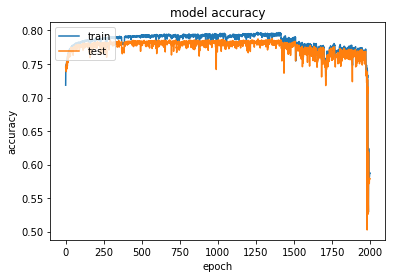

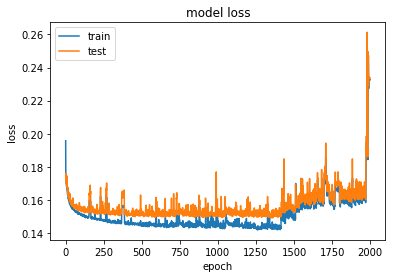

In [24]:
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
# Import `Sequential` from `keras.models`
# Split the Data Set 
X6_train, X6_test, y6_train, y6_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(len(copy_df.columns),)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))


# Add an output layer 
model.add(Dense(1, activation='tanh'))
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X6_train, y6_train,epochs=2000,validation_split=0.33, batch_size=100, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
ranFor.fit(X2_train,y2_train)
y2_pred=ranFor.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print (metrics.confusion_matrix(y2_test, y2_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y2_test, y2_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))


Accuracy: 0.7670872003093581
[[17941  2890]
 [ 6747 13798]]
             precision    recall  f1-score   support

          0       0.73      0.86      0.79     20831
          1       0.83      0.67      0.74     20545

avg / total       0.78      0.77      0.76     41376

cross val[0.59808612 0.746194   0.79164854 0.82514137 0.83666812 0.83601566
 0.77729448 0.74874918 0.75571025 0.79899935 0.77528823 0.78333696
 0.74635632 0.80704807 0.76093104 0.80857081 0.74940178 0.79029802
 0.83663259 0.80857081 0.76963237 0.78007396 0.80030455 0.78942789
 0.81161627 0.76702197 0.80704807 0.76114858 0.74287579 0.71742441]
0.7775838514373006
